In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter
#*모양은 내부적으로 실행이 되고 있는것.

In [15]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 440.0     # sine frequency, Hz
#freq 440=라 / 880=한옥타브 높은 라 / 1760=두옥타브 높은 라 / 220도 라 음이겠지 / 배수로 하면 옥타브를 넘나드는것

In [16]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [17]:
# generate phase
theta = t * 2*np.pi * freq
#타임으로부터 각도만들기

In [22]:
# generate signal by cosine-phasor
s = amp*np.sin(theta)
#sin대신 cos을 쓰면 아래 그래프의 시작점이 달라지지.
#근데 sin이든 cos이든 똑같이 '라'음이지 그게 바뀐다고 소리가 달라지지 않음
#sin과 cos은 shape자체는 똑같은데 오른쪽으로 살짝 이동한거지. cos이 얼만큼 이동하면 sin그래프가 될까? 파이/2. 90도 차이.
#파이/8만 이동하면 소리가 바뀔까? 아니 소리는 바뀌지 않음. 각도를 phase라고 하는데, phase에는 우리 귀가 sensitive하지 않으며, 인식하지 못함
#phase shift에는 어떠한 sensitivity를 갖고있지않으며, 우리 귀는 frequency에 sensitivity를 가지고 있다.

Text(0, 0.5, 'real')

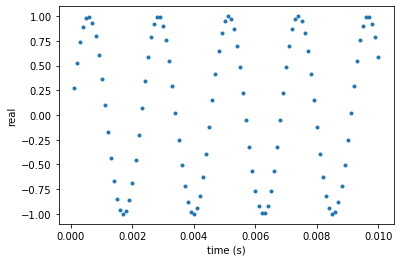

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [14]:
ipd.Audio(s,rate=sr)
#s를 play out 하는 방법. 이건 머 시험에 낼수도 없고 내지도 않을거긴함.

In [25]:
# generate signal by complex-phasor
c = amp*np.exp(theta*1j)
c
#compelx자체는 plotting이 안됨. a,b를 각각 2차원으로 plotting가능.
#사인웨이브 같은건 1차원에서 찍었고.

array([0.96202767+2.72951936e-01j, 0.85099448+5.25174630e-01j,
       0.67533281+7.37513117e-01j, ..., 0.85099448-5.25174630e-01j,
       0.96202767-2.72951936e-01j, 1.        +3.13806691e-14j])

Text(0.5, 0, 'imag')

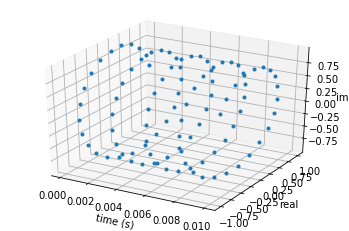

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')
#compelx자체는 plotting이 안됨. a,b를 각각 2차원으로 plotting가능.

In [29]:
ipd.Audio(c.real,rate=sr)
#소리는 똑같이 라. 근데 우리는 real만 듣는것.

Generate pulse train

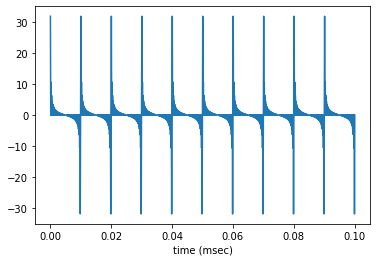

In [30]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)
#이 그림은 웨이브폼이지 스펙트럼이 아님. 이 그림에서 한 타임포인트에 어떤 주파수가 많은지 보여주는게 스펙트럼.
#그리고 거기서 carving을 하는 것. 점점 decreasing하게

In [32]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate)) #BW = Bandwidth
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b
#여기있는 거 알면좋지만 어떤 메커니즘인지는 몰라도 됨. 각각이 뭔지만 알면 됌.
#hz2w, resonance 펑션을 두개 만드는 것.
#return이 출력. 저게 없으면 아무것도 안나옴.
#resonance함수 속에서 또 hz2w를 불러오지. 그래서 그냥 resonance만 알면 돼.

In [34]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
#resonance에 sampling rate(sr)를 넣고, RG에 산맥의 위치를 적어넣는 것. 그 위치가 frequency값이니까 그냥 그걸 정해서 넣으면 됨.
#bandwidth는 어떤 산을 만들때 이게 얼마나 뚱뚱하고(width가 큼) 뾰족하냐(width가 작음)를 의미하냐고 보면 됨.
#100정도면 뚱뚱하고 60이면 날씬하다 생각하면 됨.
#위의 코드 전부는 frequency=0의 위치(RG)에 완만한 산(BWG)을 만들어라~는 의미

In [35]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
#500에도 산맥을 하나 만드는 것.s는 위에서 썼던 signal. 그냥 그걸 계속 쓴다고 생각하면 됨.
#axis는 그냥 0이라고 적으면 돼.

In [36]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
#1500에도 산맥을 만든다. 왜 여기다 만드냐고는 묻지마 나중에 할거야.

In [37]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [38]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
#얘를 다운받아서 프랏으로 보면 산맥이 만들어진 것을 볼 수 있음.

In [41]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)
#이 작업이 뭐냐만 알면 됨.
#우리의 소리는 입술이 있기 때문에 소리가 확확 공명돼서 크게 나가는 것. 이 작업은 그 효과를 주는 것.
#우리의 [어] 소리랑 비슷하다!

In [ ]:
#프랏 voweleditor 아래 (~,~,~)에서 (500,1500,~)되는 구간을 찾아봐. 거기가 제일 중간 [슈와] 느낌.
#지금까지는 create을 했다면 다음시간부터는 푸리에 analysis를 통해 수학적으로 배울거야.